In [7]:
import numpy as np
import pandas as pd
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot

In [9]:
# Load and preprocess data
data = pd.read_csv('BTC.csv')

In [10]:
data = data['Close']

In [6]:
data.count()

3613769

In [5]:
data.isnull().sum()

1243608

In [12]:
data = data.fillna(method='ffill')

In [14]:
data.isnull().sum()

0

In [15]:
data = np.log(data)

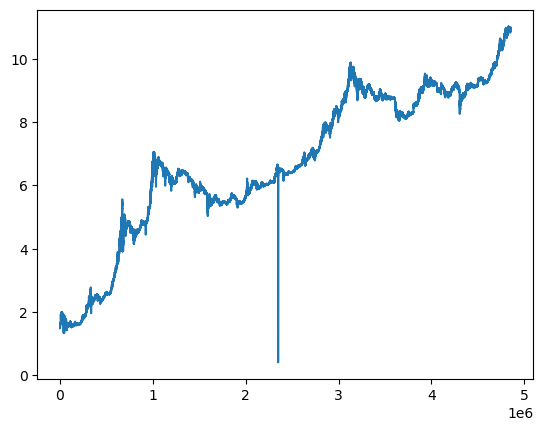

In [16]:
pyplot.plot(data)

In [17]:
data = np.array(data).reshape(-1, 1)

In [18]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [19]:
scaled_data

array([[0.10106101],
       [0.10106101],
       [0.10106101],
       ...,
       [0.99522271],
       [0.99528158],
       [0.99530975]])

In [20]:
train_size = int(len(scaled_data) * 0.9)
test_size = len(scaled_data) - train_size
# train_data, test_data = scaled_data[0:train_size,:], scaled_data[train_size:len(scaled_data),:]
train_data, test_data = data[0:train_size,:], data[train_size:len(scaled_data),:]


In [21]:
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

In [22]:
look_back = 10
train_X, train_Y = create_dataset(train_data, look_back)
test_X, test_Y = create_dataset(test_data, look_back)

In [23]:
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))


In [24]:
model = Sequential()
model.add(LSTM(50, input_shape=(1, look_back), unit_forget_bias= False))
model.add(keras.layers.Dropout(0.5))
model.add(Dense(128))
model.add(keras.layers.Dropout(0.5))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(train_X, train_Y, epochs=10, batch_size=128, verbose=2)


Epoch 1/10


KeyboardInterrupt: 

In [74]:
test_predictions = model.predict(test_X)

# Transform predictions back to original scale
# test_predictions = scaler.inverse_transform(test_predictions)
# test_Y_inverse = scaler.inverse_transform(test_Y.reshape(-1, 1))
# Calculate RMSE for test predictions
test_rmse = np.sqrt(np.mean((test_predictions - test_Y)**2))
print(f'Test RMSE: {test_rmse}')
print(test_predictions, test_Y)

10/10 [==============================] - 0s 1ms/step
Test RMSE: 0.2391053883310642
[[5.2107196]
 [5.2110047]
 [5.226696 ]
 [5.2429013]
 [5.25785  ]
 [5.25961  ]
 [5.2492633]
 [5.247866 ]
 [5.2465696]
 [5.2490478]
 [5.2531056]
 [5.254498 ]
 [5.2497945]
 [5.2476916]
 [5.240999 ]
 [5.2378   ]
 [5.2413135]
 [5.24349  ]
 [5.24706  ]
 [5.248202 ]
 [5.249601 ]
 [5.2500057]
 [5.2500944]
 [5.2484927]
 [5.248771 ]
 [5.2508283]
 [5.2481737]
 [5.243843 ]
 [5.2432404]
 [5.2452836]
 [5.246366 ]
 [5.253279 ]
 [5.2580066]
 [5.2611938]
 [5.266792 ]
 [5.271205 ]
 [5.272099 ]
 [5.2752795]
 [5.2784905]
 [5.2809567]
 [5.2811646]
 [5.2802334]
 [5.2742677]
 [5.271416 ]
 [5.2620106]
 [5.2616076]
 [5.2641215]
 [5.2657876]
 [5.261209 ]
 [5.260211 ]
 [5.253948 ]
 [5.2505965]
 [5.251156 ]
 [5.2613554]
 [5.2721524]
 [5.2804193]
 [5.2869987]
 [5.2951093]
 [5.3015914]
 [5.311801 ]
 [5.312341 ]
 [5.321293 ]
 [5.3277287]
 [5.3355517]
 [5.3394384]
 [5.344449 ]
 [5.3447576]
 [5.3493633]
 [5.3495526]
 [5.3517175]
 [5.354

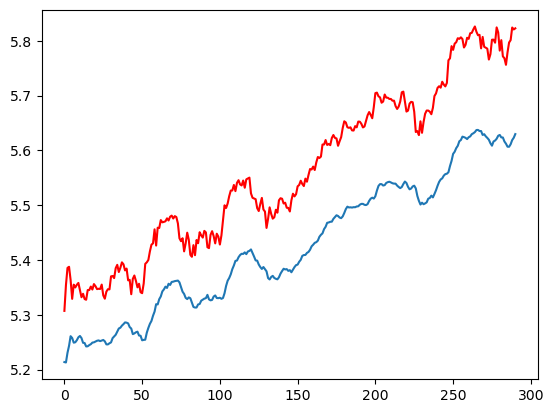

In [70]:
from matplotlib import pyplot

pyplot.plot(test_predictions)
pyplot.plot(test_Y, color='red')
pyplot.show()